In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...       pos
1  A wonderful little production. <br /><br />The...       pos
2  I thought this was a wonderful way to spend ti...       pos
3  Basically there's a family where a little boy ...       neg
4  Petter Mattei's "Love in the Time of Money" is...       pos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     39 non-null     object
 1   sentiment  39 non-null     object
dtypes: object(2)
memory usage: 752.0+ bytes


In [ ]:
data.sentiment.value_counts()

neg    20
pos    19
Name: sentiment, dtype: int64

In [ ]:
from bs4 import BeautifulSoup

cleantext = BeautifulSoup(data["review"][1], 'lxml').text

In [ ]:
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [ ]:
import re

cleantext = re.sub('r[^\w\s]', '', cleantext)

In [ ]:
cleantext

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great mastes of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [word for word in token if word.lower() not in stopword]

In [ ]:
" ".join(token_list)

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great mastes comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lemmatizer.lemmatize(" ".join(token_list))

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great mastes comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [ ]:
data.keys()

Index(['review', 'sentiment'], dtype='object')

In [ ]:
from tqdm import tqdm

def data_cleaner(data):

  clean_data = []

  for review in tqdm(data):
    cleantext = BeautifulSoup(review, 'lxml').text
    cleantext = re.sub(r'[^\w\s]', '', cleantext)
    cleantext = [token for token in cleantext.lower().split() if token not in stopword]
    cleantext = lemmatizer.lemmatize(" ".join(cleantext))
    clean_data.append(cleantext.strip())
  
  return clean_data

In [ ]:
clean_data = data_cleaner(data.review.values)

100%|██████████| 39/39 [00:00<00:00, 1727.95it/s]


In [ ]:
clean_data[0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

Delimo dataset u skupove koji sam potrebni za treniranje

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.sentiment, test_size=0.2, random_state=42, stratify=data.sentiment)

y_train

4     pos
24    neg
17    neg
14    pos
34    neg
9     pos
12    neg
27    neg
38    pos
5     pos
26    pos
30    pos
3     neg
32    neg
10    neg
19    neg
8     neg
16    pos
11    neg
35    neg
25    pos
31    pos
33    pos
37    neg
2     pos
7     neg
29    pos
6     pos
36    neg
20    pos
23    neg
Name: sentiment, dtype: object

Enkodujemo nase labele (target) sa vrednostima od 0 to n_klasa-1
Poredimo y_train ispit gore i ispod nakon labeliranja

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

y_train

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0])

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(31, 2) (31,)
(8, 2) (8,)


In [ ]:
clean_data_train_data = data_cleaner(X_train.review.values)

100%|██████████| 31/31 [00:00<00:00, 1401.21it/s]


In [ ]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

review sentiment  \
4   Petter Mattei's "Love in the Time of Money" is...       pos   
24  This was the worst movie I saw at WorldFest an...       neg   
17  This movie made it into one of my top 10 most ...       neg   
14  This a fantastic movie of three prisoners who ...       pos   
34  I watched this film not really expecting much,...       neg   

                                         cleaned_text  
4   petter matteis love time money visually stunni...  
24  worst movie saw worldfest also received least ...  
17  movie made one top 10 awful movies horrible wa...  
14  fantastic movie three prisoners become famous ...  
34  watched film really expecting much got pack 5 ...

In [ ]:
clean_data_test_data = data_cleaner(X_test.review.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

100%|██████████| 8/8 [00:00<00:00, 488.90it/s]


review sentiment  \
15  Kind of drawn in by the erotic scenes, only to...       neg   
28  This movie was so frustrating. Everything seem...       neg   
18  I remember this film,it was the first film i h...       pos   
22  What an absolutely stunning movie, if you have...       pos   
13  The cast played Shakespeare.<br /><br />Shakes...       neg   

                                         cleaned_text  
15  kind drawn erotic scenes realize one amateuris...  
28  movie frustrating everything seemed energetic ...  
18  remember filmit first film watched cinema pict...  
22  absolutely stunning movie 25 hrs kill watch wo...  
13  cast played shakespeareshakespeare losti appre...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = MultinomialNB()

Koristicemo GridSearch

Veoma detaljna pretrada odredjenih vrednosti parametara za estimator

alpha_ranges je recnik vrednosti koje grid treba da isprobava kao vrednosti
Finalna ideja jeste da dobijemo najbolju vrednost koju bismo prosledili u klasifikator

Prosledili smo MNB kao classifier u GridSearch i sada cekamo pronalazak najbolje vrednosti

In [ ]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [ ]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

grid_search.cv_results_

{'mean_fit_time': array([0.0048639 , 0.0032506 , 0.00298397, 0.00315793, 0.00309436,
        0.00307393]),
 'std_fit_time': array([1.33987444e-03, 2.56656318e-04, 1.35780212e-04, 4.05275742e-05,
        6.25418586e-05, 1.08476174e-04]),
 'mean_score_time': array([0.00130645, 0.00104634, 0.00102274, 0.00114926, 0.00108385,
        0.00105937]),
 'std_score_time': array([5.79801218e-05, 8.47980254e-05, 1.10915188e-05, 1.32658653e-04,
        2.43475064e-05, 8.16291117e-06]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10.0, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10.0},
  {'alpha': 100}],
 'split0_test_score': array([0.54545455, 0.54545455, 0.54545455, 0.54545455, 0.63636364,
        0.54545455]),
 'split1_test_score': array([0.8, 0.8, 0.6, 0.6, 0.6, 0.6]),
 'split2_test_score': array([0.7, 0.5, 0.5, 0.

In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]

train_acc = grid_search.cv_results_['mean_train_score']
train_stdev = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_stdev = grid_search.cv_results_['std_test_score']

In [ ]:
import matplotlib.pyplot as plt

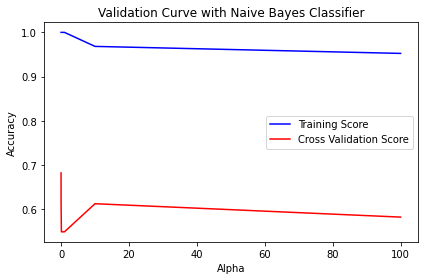

In [ ]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
grid_search.best_estimator_

MultinomialNB(alpha=0.001)

In [ ]:
classifier = MultinomialNB(alpha=0.001)
classifier.fit(train_x_bow, y_train)

MultinomialNB(alpha=0.001)

In [ ]:
predict = classifier.predict(test_x_bow)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy is ", accuracy_score(y_test, predict))

Accuracy is  0.875


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Accuracy is ", classification_report(y_test, predict))

Accuracy is                precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



In [ ]:
text = ["I hated the movie. It was bad"]
text_vec = vec.transform(text)
classifier.predict(text_vec)

array([0])

In [ ]:
le.inverse_transform([0])

array(['neg'], dtype=object)